# Harmonic oscillators

## Linear harmonic oscillator

$$ \frac{d^2x}{dt^2} + 2 \beta \frac{dx}{dt} + \omega^2 x = F \cos{\Omega t} $$

With initial conditions:

$$x(0) = 1, x'(0) = 0$$

In [1]:
from CommonFunctions import *
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [2]:
t, beta, omega, F, Omega = sp.symbols('t beta omega F Omega')
x = sp.Function('x')(t)
diff_eq = sp.Eq(x.diff(t, 2) + 2*beta*x.diff(t) + omega**2 * x, F * sp.cos(Omega * t))
diff_eq

Eq(2*beta*Derivative(x(t), t) + omega**2*x(t) + Derivative(x(t), (t, 2)), F*cos(Omega*t))

Now we specify initial conditions:

In [3]:
ics = {x.subs(t, 0): 1, x.diff(t).subs(t, 0): 0}
ics

{x(0): 1, Subs(Derivative(x(t), t), t, 0): 0}

## Case $\beta = 0, \omega = 1, F = 0, \Omega = 0$

In [4]:
beta_val, omega_val, F_val, Omega_val = 0, 1, 0, 0
x_eq = diff_eq.subs([(beta, beta_val), (omega, omega_val), (F, F_val), (Omega, Omega_val)])
x_eq

Eq(x(t) + Derivative(x(t), (t, 2)), 0)

In [5]:
sp.dsolve(x_eq, x)

Eq(x(t), C1*sin(t) + C2*cos(t))

In [6]:
sp.dsolve(x_eq, x, ics=ics)

Eq(x(t), cos(t))

## Case $\beta = \frac{1}{2}, \omega = 1, F = 0, \Omega = 0$

In [7]:
beta_val, omega_val, F_val, Omega_val = sp.Rational(1, 2), 1, 0, 0
x_eq = diff_eq.subs([(beta, beta_val), (omega, omega_val), (F, F_val), (Omega, Omega_val)])
x_eq

Eq(x(t) + Derivative(x(t), t) + Derivative(x(t), (t, 2)), 0)

In [8]:
sp.dsolve(x_eq, x)

Eq(x(t), (C1*sin(sqrt(3)*t/2) + C2*cos(sqrt(3)*t/2))*exp(-t/2))

In [9]:
sol = sp.dsolve(x_eq, x, ics=ics)
sol

Eq(x(t), (sqrt(3)*sin(sqrt(3)*t/2)/3 + cos(sqrt(3)*t/2))*exp(-t/2))

In [10]:
t_a, t_b = 0, 25
quality = 500
t_values = np.linspace(t_a, t_b, quality)
x_values = evaluate_function(sol.rhs, t, t_values)

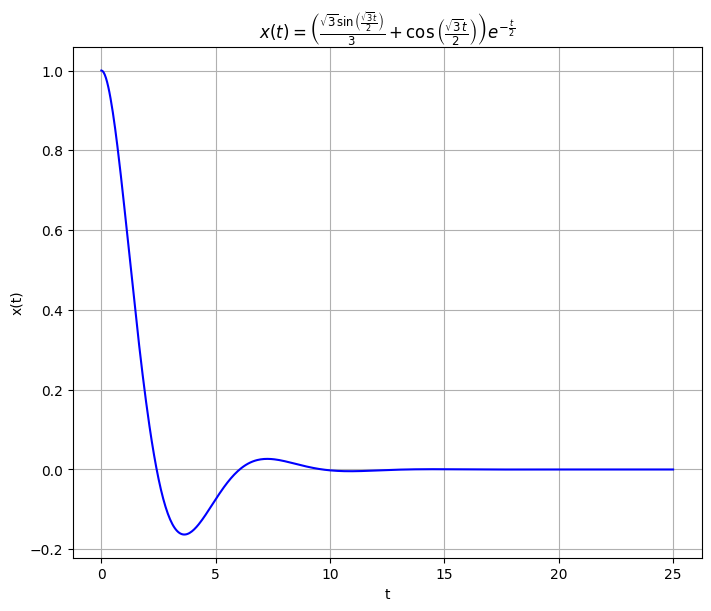

In [11]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 6))
axes.plot(t_values, x_values, color='blue')
axes.set(xlabel='t', ylabel='x(t)', title=f'${sp.latex(sol)}$')
axes.grid(True)

## Case $\beta = \frac{1}{2}, \omega = 1, F = 1, \Omega = 2$

In [12]:
beta_val, omega_val, F_val, Omega_val = sp.Rational(1, 2), 1, 1, 2
x_eq = diff_eq.subs([(beta, beta_val), (omega, omega_val), (F, F_val), (Omega, Omega_val)])
x_eq

Eq(x(t) + Derivative(x(t), t) + Derivative(x(t), (t, 2)), cos(2*t))

In [13]:
sp.dsolve(x_eq, x)

Eq(x(t), (C1*sin(sqrt(3)*t/2) + C2*cos(sqrt(3)*t/2))*exp(-t/2) + 2*sin(2*t)/13 - 3*cos(2*t)/13)

In [14]:
sol = sp.dsolve(x_eq, x, ics=ics)
sol

Eq(x(t), (8*sqrt(3)*sin(sqrt(3)*t/2)/39 + 16*cos(sqrt(3)*t/2)/13)*exp(-t/2) + 2*sin(2*t)/13 - 3*cos(2*t)/13)

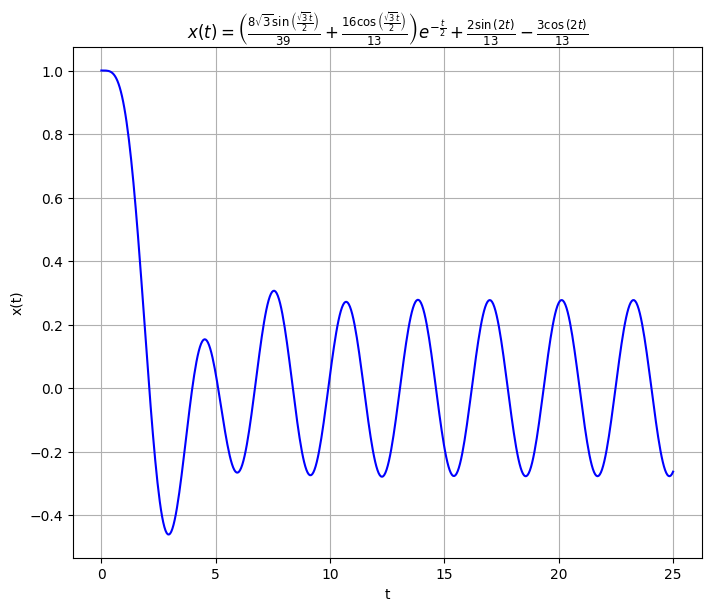

In [15]:
t_a, t_b = 0, 25
quality = 500
t_values = np.linspace(t_a, t_b, quality)
x_values = evaluate_function(sol.rhs, t, t_values)
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 6))
axes.plot(t_values, x_values, color='blue')
axes.set(xlabel='t', ylabel='x(t)', title=f'${sp.latex(sol)}$')
axes.grid(True)

## Case $\beta = 0, \omega = 1, F = 1, \Omega = 1$

In [16]:
beta_val, omega_val, F_val, Omega_val = 0, 1, 1, 1
x_eq = diff_eq.subs([(beta, beta_val), (omega, omega_val), (F, F_val), (Omega, Omega_val)])
x_eq

Eq(x(t) + Derivative(x(t), (t, 2)), cos(t))

In [17]:
sp.dsolve(x_eq, x)

Eq(x(t), C2*cos(t) + (C1 + t/2)*sin(t))

In [18]:
sol = sp.dsolve(x_eq, x, ics=ics)
sol

Eq(x(t), t*sin(t)/2 + cos(t))

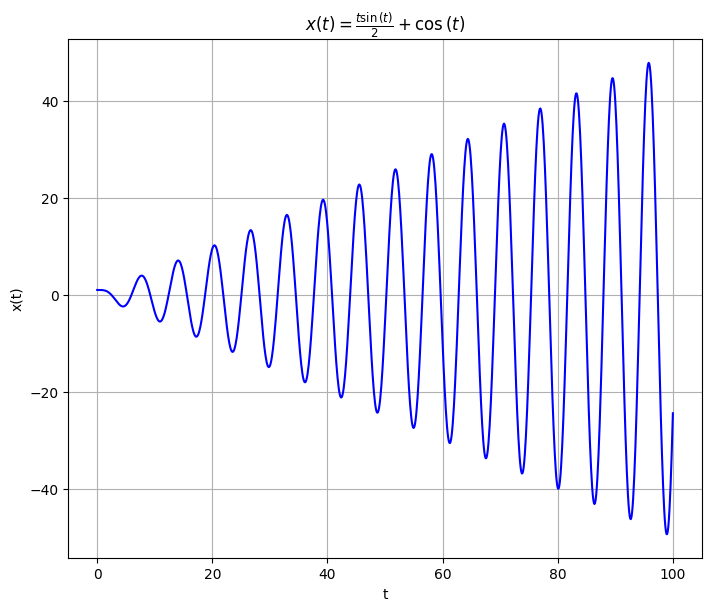

In [19]:
t_a, t_b = 0, 100
quality = 1000
t_values = np.linspace(t_a, t_b, quality)
x_values = evaluate_function(sol.rhs, t, t_values)
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 6))
axes.plot(t_values, x_values, color='blue')
axes.set(xlabel='t', ylabel='x(t)', title=f'${sp.latex(sol)}$')
axes.grid(True)

# Nonlinear harmonic oscillator

## Nonlinearity

We have a nonlinear harmonic oscillator:

$$ \frac{dx^2}{dt^2} + x - x^3 = 0 $$

Then corresponding potential $V(x)$ is:

$$ V(x) = - \int{(-x + x^3)dx} $$

In [20]:
V = sp.Function('V')(x)
diff_eq = sp.Eq(x.diff(t, 2) + x - x**3, 0)
V_eq = sp.Eq(V, -sp.integrate(sp.solve(diff_eq, x.diff(t, 2))[0], x))
V_eq

Eq(V(x(t)), -x(t)**4/4 + x(t)**2/2)

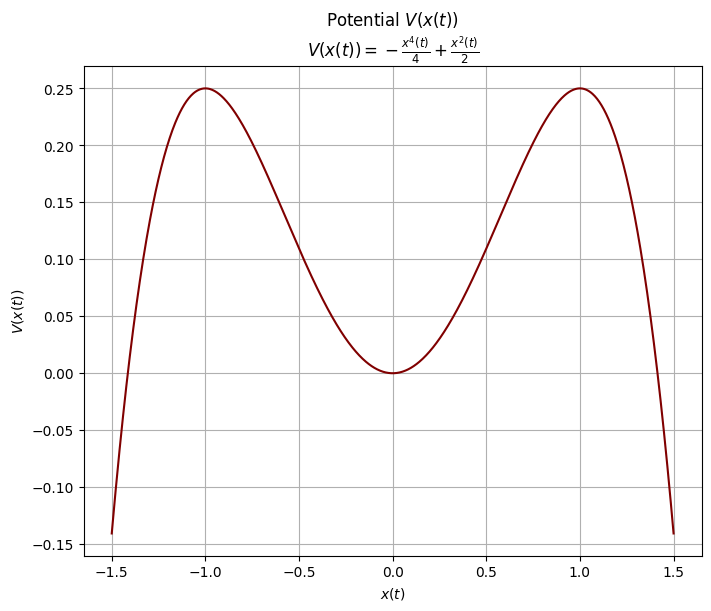

In [21]:
x_a, x_b = -1.5, 1.5
quality = 1000
x_values = np.linspace(x_a, x_b, quality)
V_values = evaluate_function(V_eq.rhs, x, x_values)
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 6))
axes.plot(x_values, V_values, color='maroon')
axes.set(xlabel=f'${x}$', ylabel=f'${V}$', title=f'Potential ${V}$\n${sp.latex(V_eq)}$')
axes.grid(True)

In [22]:
v = sp.Function('v')(t)
diff_eq1 = sp.Eq(x.diff(t), v)
diff_eq1

Eq(Derivative(x(t), t), v(t))

In [23]:
diff_eq2 = sp.Eq(v.diff(t), sp.solve(diff_eq, x.diff(t, 2))[0])
diff_eq2

Eq(Derivative(v(t), t), x(t)**3 - x(t))

In [24]:
fixed_points = sp.solve([diff_eq1.rhs, diff_eq2.rhs], [x, v])
fixed_points

[(-1, 0), (0, 0), (1, 0)]

In [25]:
for fixed_point in fixed_points:
    q, p, r = find_fixed_point_parameters(diff_eq1, diff_eq2, x, v, fixed_point=fixed_point)
    print(f'{fixed_point}: {classify_fixed_point(q, p, r)}')

(-1, 0): saddle
(0, 0): vortex/focal
(1, 0): saddle


In [26]:
a, b = -2, 2
x_step, v_step = .125, .125
parameters = (a, b, x_step, a, b, v_step)
t_a, t_b = -5, 5
quality = 1000

In [27]:
init_x = [0, 0, 0]
init_v = [0.69, 0.74, -0.74]
trajectories = calculate_numerically_list_of_trajectories(
    [diff_eq1.rhs, diff_eq2.rhs], [x, v], t, (t_a, t_b), 0, [(a, b), (a, b)], zip(init_x, init_v), quality
)

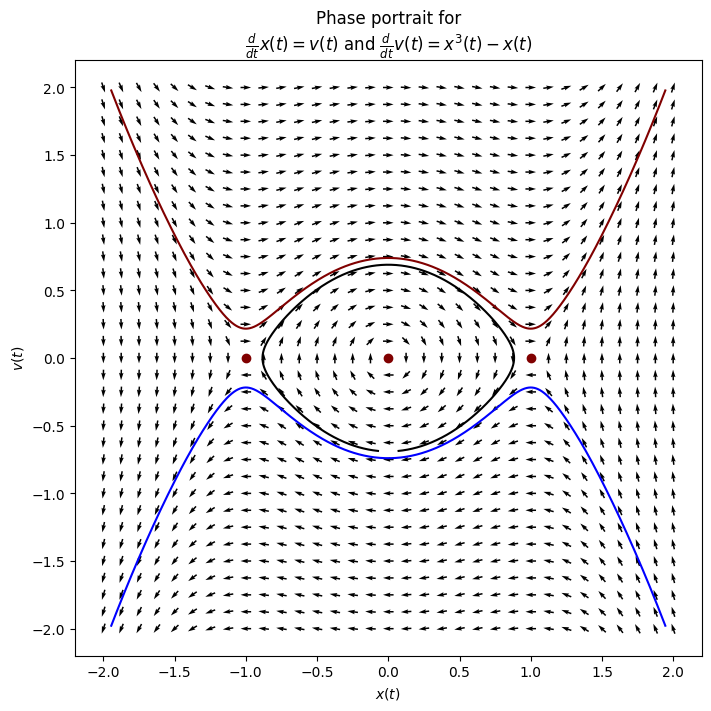

In [28]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 7))
phase_portrait([diff_eq1, diff_eq2], [x, v], parameters, axes, normalize=True)
for trajectory, color in zip(trajectories, ['black', 'maroon', 'blue']):
    axes.plot(*trajectory, color=color)
axes.scatter(*zip(*fixed_points), color='maroon', zorder=10)
_=axes.set(title=f'Phase portrait for\n${sp.latex(diff_eq1)}$ and ${sp.latex(diff_eq2)}$')

## Two-well potential

$$ V(x) = (x^2 - 1)^2 = x^4 - 2x^2 + 1 $$

In [29]:
V_eq = sp.Eq(V, x**4 - 2*x**2 + 1)
V_eq

Eq(V(x(t)), x(t)**4 - 2*x(t)**2 + 1)

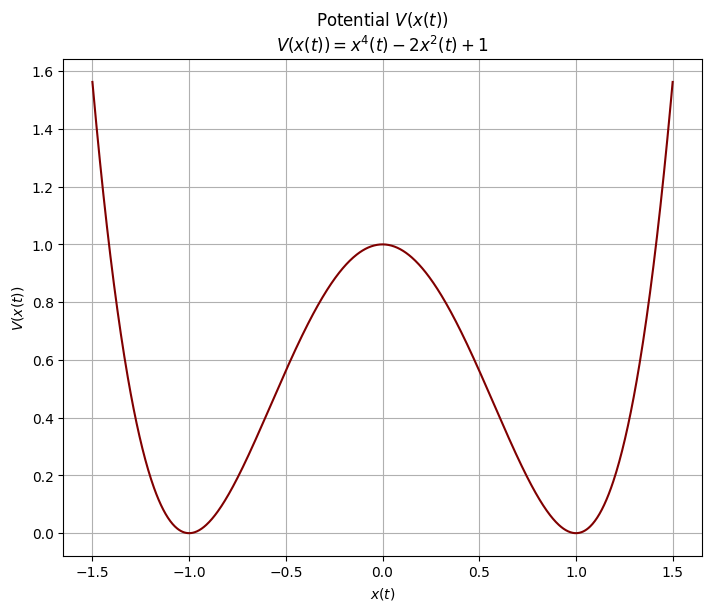

In [30]:
x_a, x_b = -1.5, 1.5
quality = 1000
x_values = np.linspace(x_a, x_b, quality)
V_values = evaluate_function(V_eq.rhs, x, x_values)
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 6))
axes.plot(x_values, V_values, color='maroon')
axes.set(xlabel=f'${x}$', ylabel=f'${V}$', title=f'Potential ${V}$\n${sp.latex(V_eq)}$')
axes.grid(True)

In [31]:
diff_eq1

Eq(Derivative(x(t), t), v(t))

In [32]:
diff_eq2 = sp.Eq(v.diff(t), -V_eq.rhs.diff(x))
diff_eq2

Eq(Derivative(v(t), t), -4*x(t)**3 + 4*x(t))

In [33]:
fixed_points = sp.solve([diff_eq1.rhs, diff_eq2.rhs], [x, v])
fixed_points

[(-1, 0), (0, 0), (1, 0)]

In [34]:
for fixed_point in fixed_points:
    q, p, r = find_fixed_point_parameters(diff_eq1, diff_eq2, x, v, fixed_point=fixed_point)
    print(f'{fixed_point}: {classify_fixed_point(q, p, r)}')

(-1, 0): vortex/focal
(0, 0): saddle
(1, 0): vortex/focal


In [35]:
a, b = -2, 2
x_step, v_step = .125, .125
parameters = (a, b, x_step, a, b, v_step)
t_a, t_b = -5, 5
quality = 1000

In [36]:
init_x = [0, -1, 1]
init_v = [0.69, 1.4, 1.4]
trajectories = calculate_numerically_list_of_trajectories(
    [diff_eq1.rhs, diff_eq2.rhs], [x, v], t, (t_a, t_b), 0, [(a, b), (a, b)], zip(init_x, init_v), quality
)

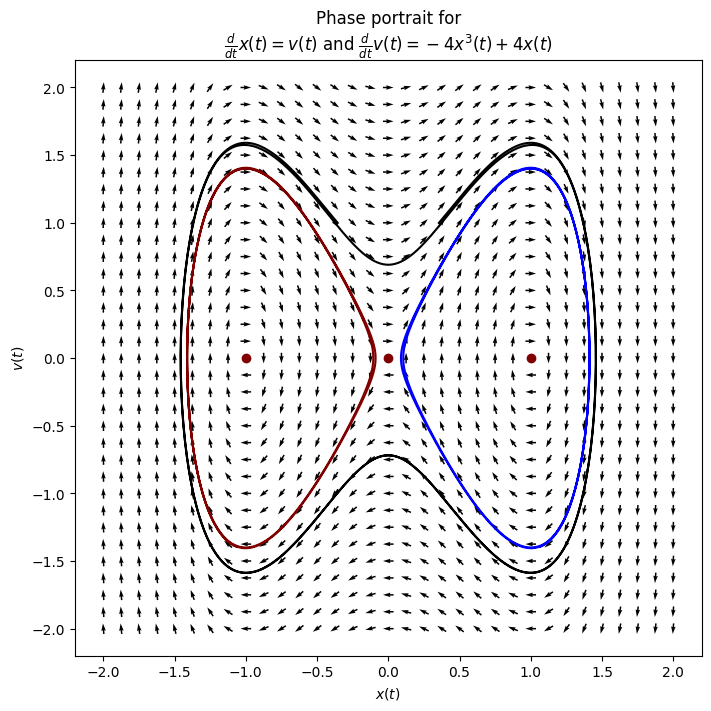

In [37]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 7))
phase_portrait([diff_eq1, diff_eq2], [x, v], parameters, axes, normalize=True)
for trajectory, color in zip(trajectories, ['black', 'maroon', 'blue']):
    axes.plot(*trajectory, color=color)
axes.scatter(*zip(*fixed_points), color='maroon', zorder=10)
_=axes.set(title=f'Phase portrait for\n${sp.latex(diff_eq1)}$ and ${sp.latex(diff_eq2)}$')